In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import math
%matplotlib inline

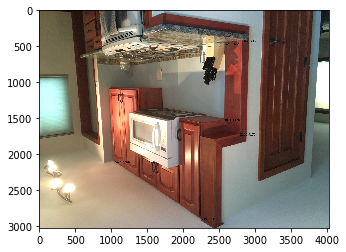

In [21]:
image = cv2.imread('/home/scott/VB-Research/Scott-Notes/Temp-Accuracy.png',1)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
image = cv2.flip(image,-1)
plt.imshow(image)
image = cv2.flip(image,1)
plt.imshow(image)

In [2]:
points = {}
points['Br'] = [2827,413]
points['Tr'] = [2796,1712]
points['b'] = [2588,455]
points['t'] = [2576,1515]
points['r1'] = [2230,2886]
points['r2'] = [1047,2099]
# --- need to add later
points['P'] = [11020000/4643,19451.7984062]

points['Q'] = [-492200/841,1012.62941736]


points['I'] = [284957500/110671,1666.47202067]

In [3]:
x = range(4032)
deg = 1
coeffs = np.polyfit([points['Br'][0],points['Tr'][0]],[points['Br'][1],points['Tr'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line4 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['b'][0],points['t'][0]],[points['b'][1],points['t'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line3 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['r1'][0],points['r2'][0]],[points['r1'][1],points['r2'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line2 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['Br'][0],points['b'][0]],[points['Br'][1],points['b'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line1 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['Q'][0],points['Tr'][0]],[points['Q'][1],points['Tr'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line5 = coeffs[0]*x + coeffs[1]


 
-41.9 x + 1.189e+05
 
-88.33 x + 2.291e+05
 
0.6653 x + 1402
 
-0.1757 x + 909.8
 
0.2068 x + 1134


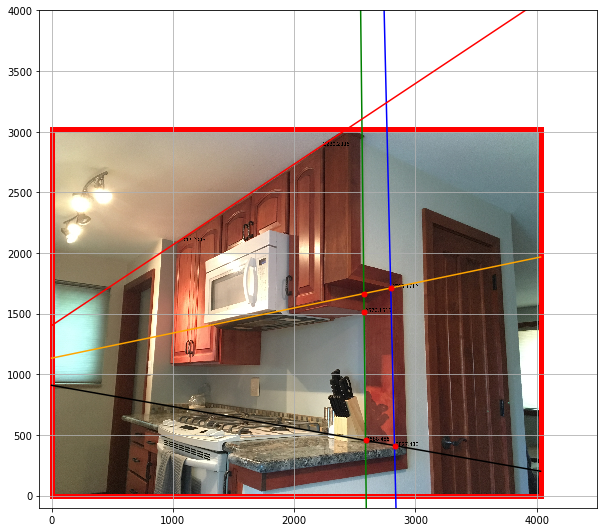

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.axis((-100,4500,-100,4000))
rect = patches.Rectangle((0,0),4032,3024,linewidth=5,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.grid('on')
plt.plot(line3,'g')
plt.plot(line4,'b')
plt.plot(line2,'r')
plt.plot(line1,'black')
plt.plot(line5,'orange')
plt.plot(points['I'][0], points['I'][1], marker='o', markersize=5, color="red")
plt.plot(points['b'][0], points['b'][1], marker='o', markersize=5, color="red")
plt.plot(points['t'][0], points['t'][1], marker='o', markersize=5, color="red")
plt.plot(points['Br'][0], points['Br'][1], marker='o', markersize=5, color="red")
plt.plot(points['Tr'][0], points['Tr'][1], marker='o', markersize=5, color="red")
plt.imshow(image)
# plt.savefig('Second-Accuracy-Test-fit.png')
plt.show()

In [5]:
def euclid(a,b):
    return( math.sqrt( (abs(a[0]-b[0]))**2 + (abs(a[1]-b[1]))**2))

In [6]:
#print(euclid([0,0],[3,4]))
BI = euclid(points['I'],points['b'])
BP = euclid(points['b'],points['P'])
TI = euclid(points['t'],points['I'])
TP = euclid(points['t'],points['P'])
print(BI)
print(BP)
print(TI)
print(TP)

# print(euclid(points['I'],points['t']))
# print(euclid(points['t'],points['b']))
# print(euclid(points['b'],points['P']))
# print('second:')
# print(euclid([0,0],[3,4]))

Cross1 = (BI/BP)/(TI/TP)
print("CrossRatio:",Cross1)

1211.5437530514962
18998.00975804417
151.47664532517538
17937.941836118254
CrossRatio: 7.551929538906826


In [7]:
BrTr = euclid(points['Br'],points['Tr'])
print(BrTr)
BrP = euclid(points['Br'],points['P'])
print(BrP)
TrP = euclid(points['Tr'],points['P'])
first = BrTr/BrP
print(first)

1299.3698472721305
19044.19959873468
0.06822916555434874


In [8]:
second = first / Cross1
print(second)

0.009034666597832851


In [9]:
h = (BrTr - (second*BrP))/(1+second)
print("Pixel height:", h)

Pixel height: 1117.2181596851804


In [10]:
# Actual pixel height, should be less than cell above...
print(euclid(points['t'],points['b']))

1060.0679223521481


In [11]:
Known = 27.875
Calculated = Known * h / BrTr
print("Final Calculated Dimensional Height (inches):", Calculated)

Final Calculated Dimensional Height (inches): 23.967353303298683


In [12]:
ActualHeight = 24.25 
print("Error: ",abs(Calculated - ActualHeight)/ActualHeight*100, "%")

Error:  1.1655533884590386 %


In [13]:
CentimeterError = (Calculated - ActualHeight) * 2.54
print("Error: ", CentimeterError, "cm")

Error:  -0.7179226096213447 cm


To conclude, our calculation underestimated the height we wanted to calculated by about 0.7179 cm. 